<a href="https://colab.research.google.com/github/kotapranithaa-blip/Code/blob/main/TN1031.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install libraries
!pip install xgboost shap lime scikit-learn pandas matplotlib seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=bc8cd372b313458e5d9ae46eafc1c56962f1223022287eef28ac575f28030cde
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

In [4]:
# Load dataset
data_path = '/content/drive/MyDrive/bank-full.csv'
df = pd.read_csv(data_path, sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [7]:
df.duplicated().sum()

np.int64(0)

# **EDA**

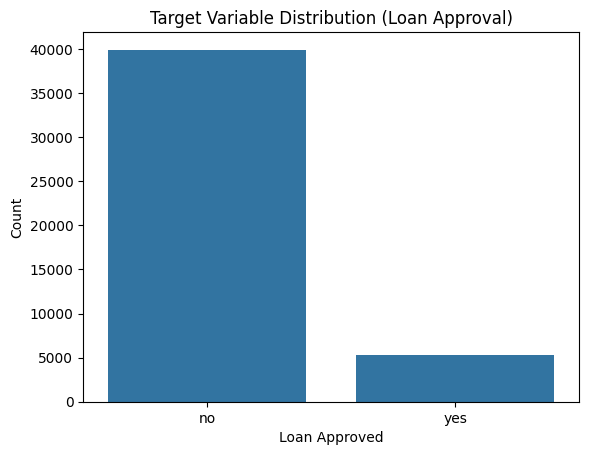

y
no     88.30152
yes    11.69848
Name: proportion, dtype: float64


In [9]:
# Class distribution
sns.countplot(data=df, x='y')
plt.title('Target Variable Distribution (Loan Approval)')
plt.xlabel('Loan Approved')
plt.ylabel('Count')
plt.show()

# Show class balance
print(df['y'].value_counts(normalize=True) * 100)

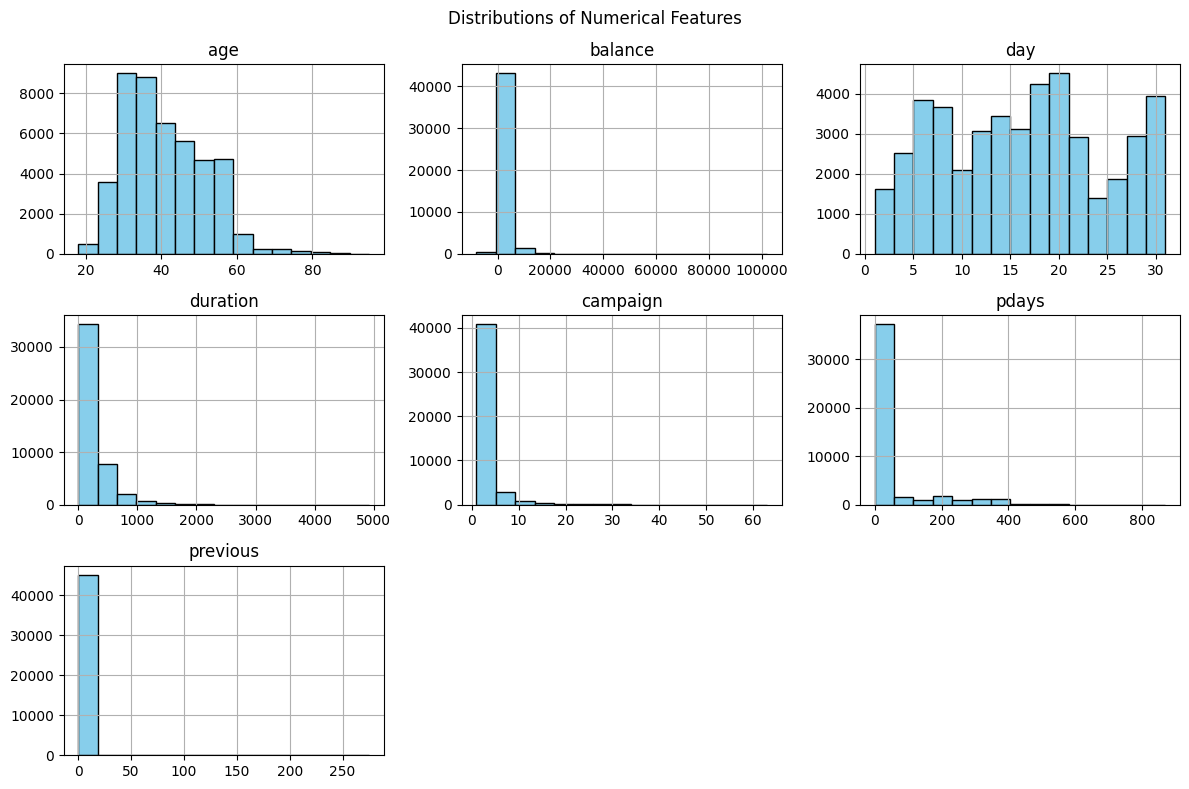

In [10]:
# Numeric Feature distribution
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

df[numerical_cols].hist(bins=15, figsize=(12, 8), color='skyblue', edgecolor='black')
plt.suptitle('Distributions of Numerical Features')
plt.tight_layout()
plt.show()


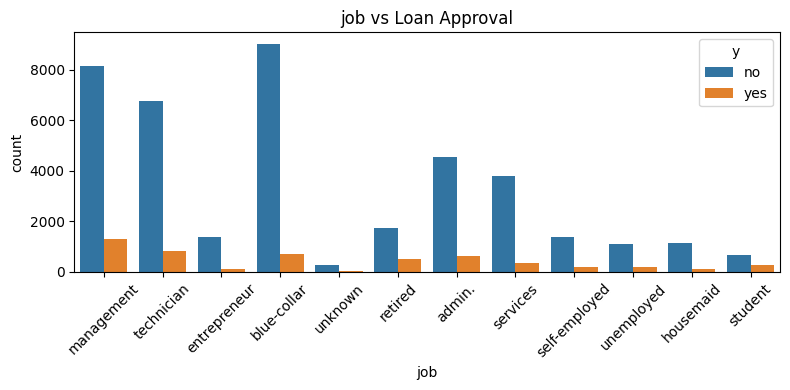

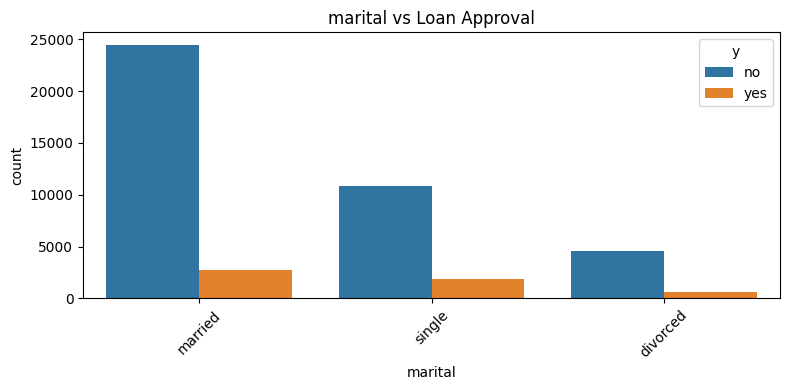

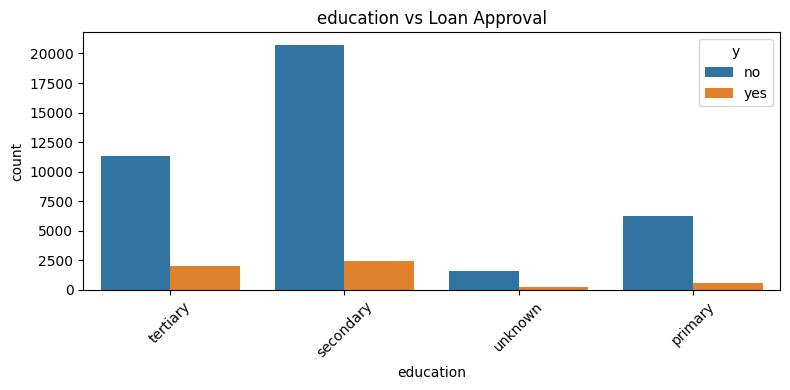

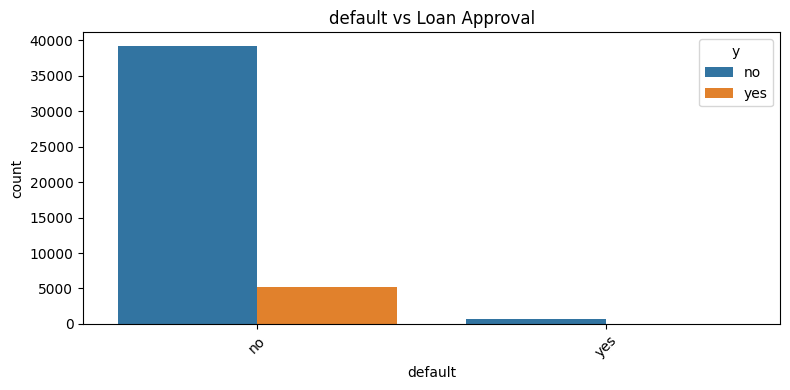

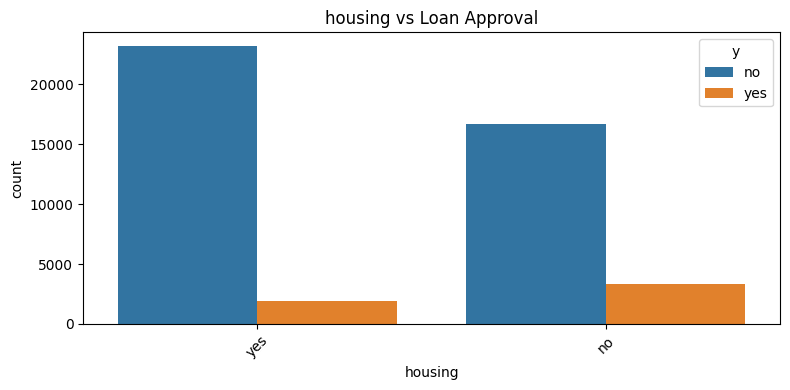

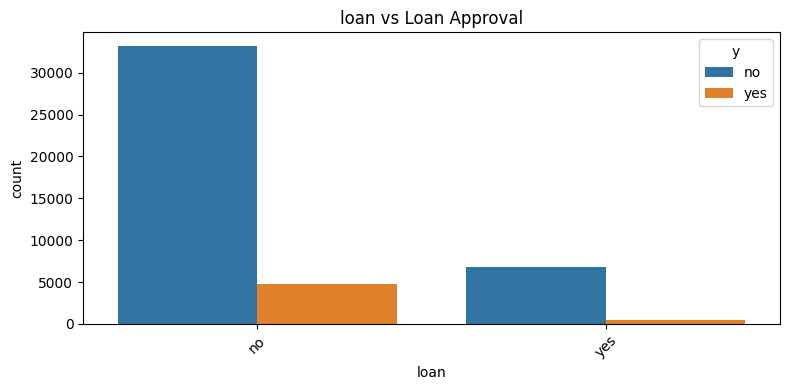

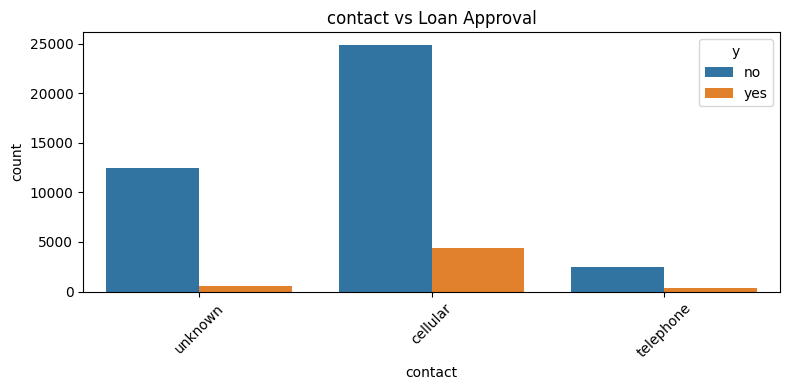

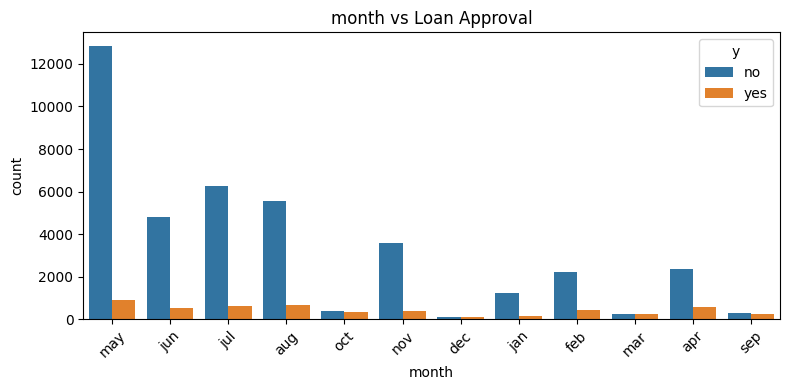

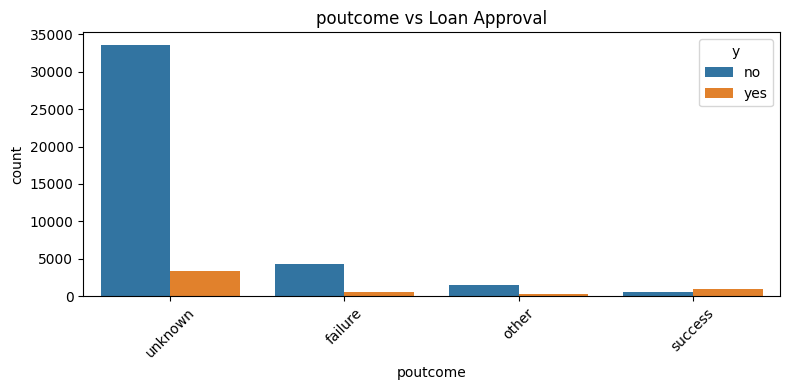

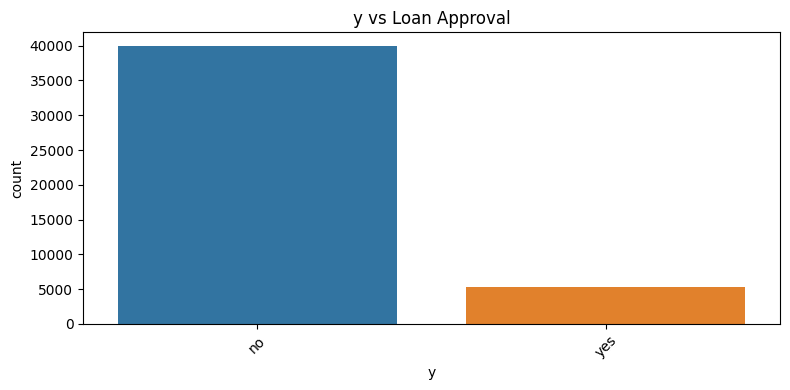

In [11]:
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, hue='y')
    plt.title(f'{col} vs Loan Approval')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


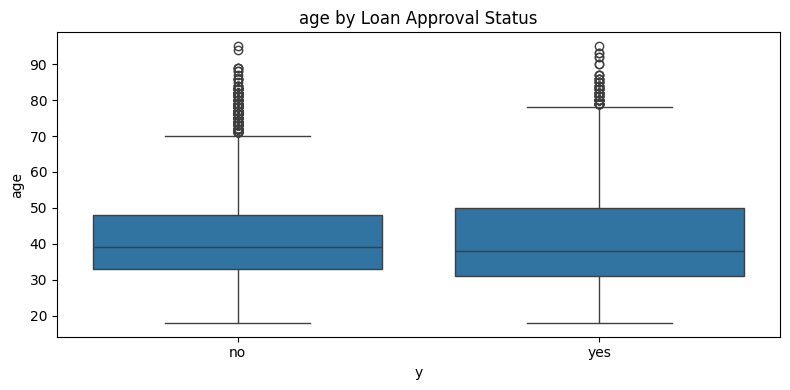

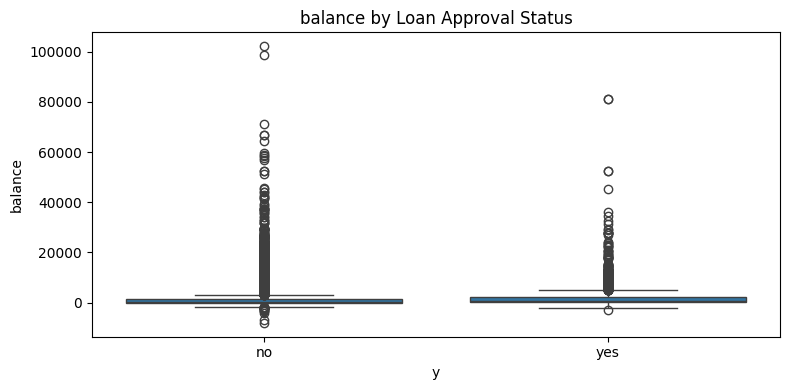

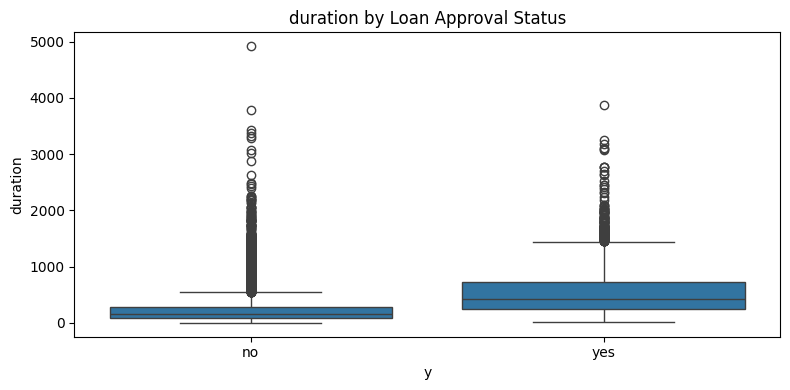

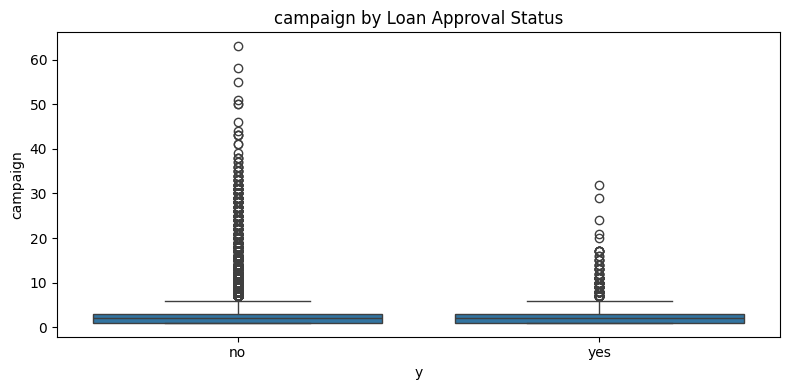

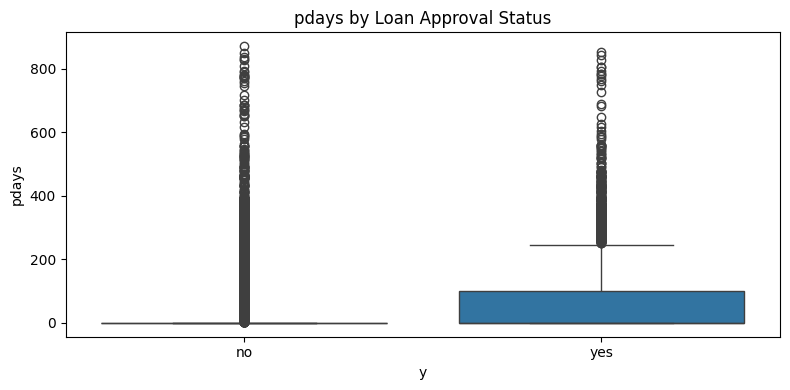

In [12]:
# BoxPlot numeric columns by target class
for col in ['age', 'balance', 'duration', 'campaign', 'pdays']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='y', y=col, data=df)
    plt.title(f'{col} by Loan Approval Status')
    plt.tight_layout()
    plt.show()


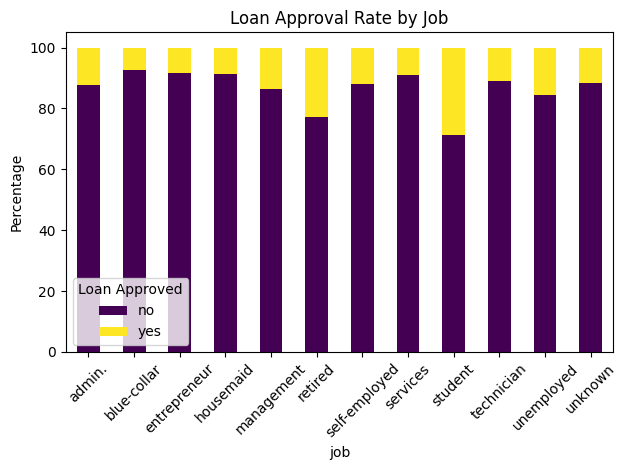

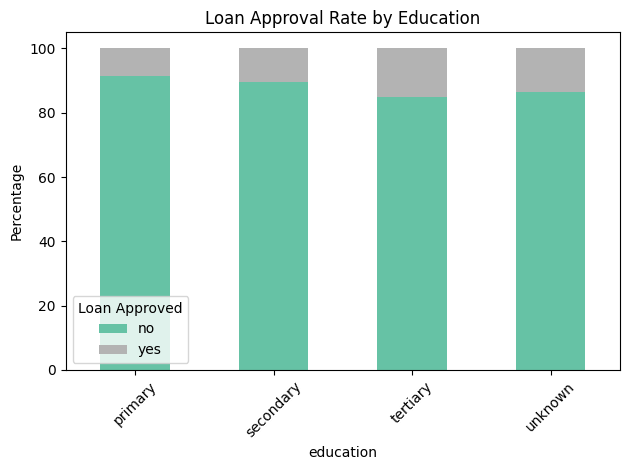

In [13]:
# Bivariate Analysis: Job and Education by Approval Rate
cross = pd.crosstab(df['job'], df['y'], normalize='index') * 100
cross.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Loan Approval Rate by Job')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Loan Approved')
plt.tight_layout()
plt.show()

cross2 = pd.crosstab(df['education'], df['y'], normalize='index') * 100
cross2.plot(kind='bar', stacked=True, colormap='Set2')
plt.title('Loan Approval Rate by Education')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Loan Approved')
plt.tight_layout()
plt.show()


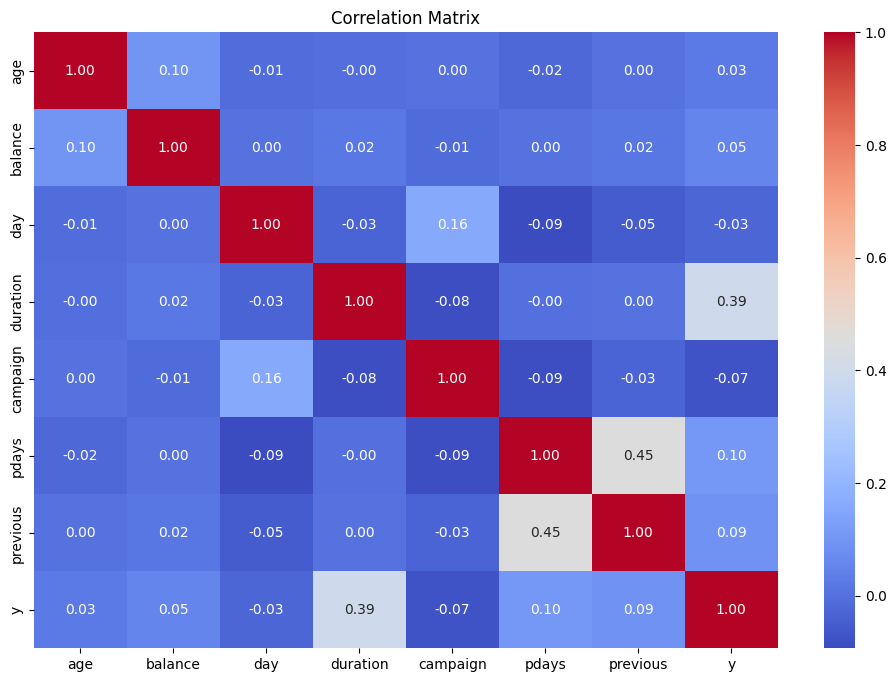

In [16]:
#  Correlation Matrix (Heatmap)
# Encode 'y' for numeric correlation
df_corr = df.copy()
df_corr['y'] = df_corr['y'].map({'yes': 1, 'no': 0})

# Select only numerical columns for correlation calculation
numerical_cols = df_corr.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(12, 8))
sns.heatmap(df_corr[numerical_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# **Data Preprocessing**

In [18]:
# Encode target
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# Encode categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [19]:
# Handle imbalance
majority = df_encoded[df_encoded.y == 0]
minority = df_encoded[df_encoded.y == 1]
minority_upsampled = resample(minority, replace=True, n_samples=len(majority), random_state=42)
df_balanced = pd.concat([majority, minority_upsampled])

# Split
X = df_balanced.drop("y", axis=1)
y = df_balanced["y"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# **XGBoost Model**

In [21]:
# Implement model

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the XGBoost model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:18:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [22]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(report)
print('Confusion Matrix:')
conf_matrix

Accuracy: 0.9212
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.88      0.92     11967
           1       0.89      0.96      0.92     11987

    accuracy                           0.92     23954
   macro avg       0.92      0.92      0.92     23954
weighted avg       0.92      0.92      0.92     23954

Confusion Matrix:


array([[10500,  1467],
       [  421, 11566]])

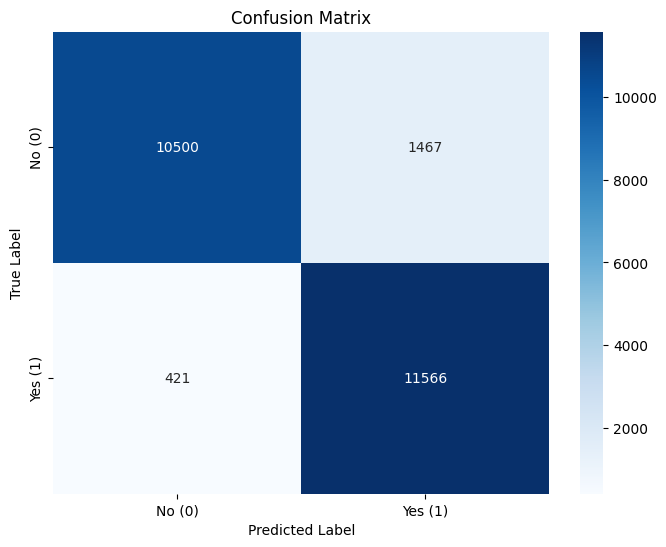

In [23]:
# Confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No (0)', 'Yes (1)'], yticklabels=['No (0)', 'Yes (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()